Loaded RAW: (200000, 24)
Data Overview: {'shape': (200000, 24), 'dtypes': {dtype('O'): 20, dtype('int64'): 2, dtype('float64'): 2}, 'duplicates': np.int64(0), 'missing_total': np.int64(0), 'memory_usage_mb': np.float64(249.58870124816895)}


INFO:eda_utils_prod:No missing values found.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:root:Dropping irrelevant columns: ['Customer_ID', 'Customer_Name', 'Merchant_ID', 'Customer_Contact', 'Customer_Email', 'Transaction_ID', 'Transaction_Description', 'Transaction_Currency']
INFO:root:Encoding categorical columns: ['Gender', 'State', 'Account_Type', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Device_Type']


Saved CLEAN CSV: (200000, 17)
Saved FEATURES CSV: (200000, 84)


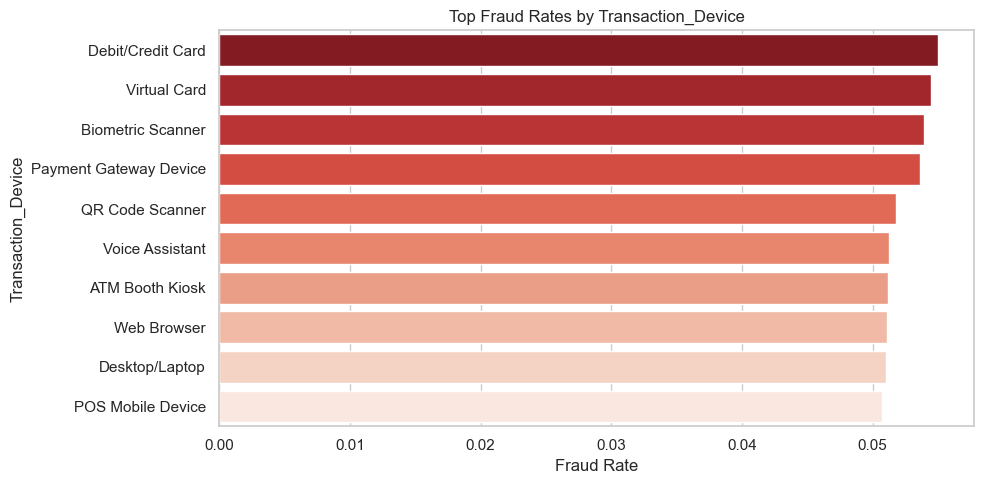

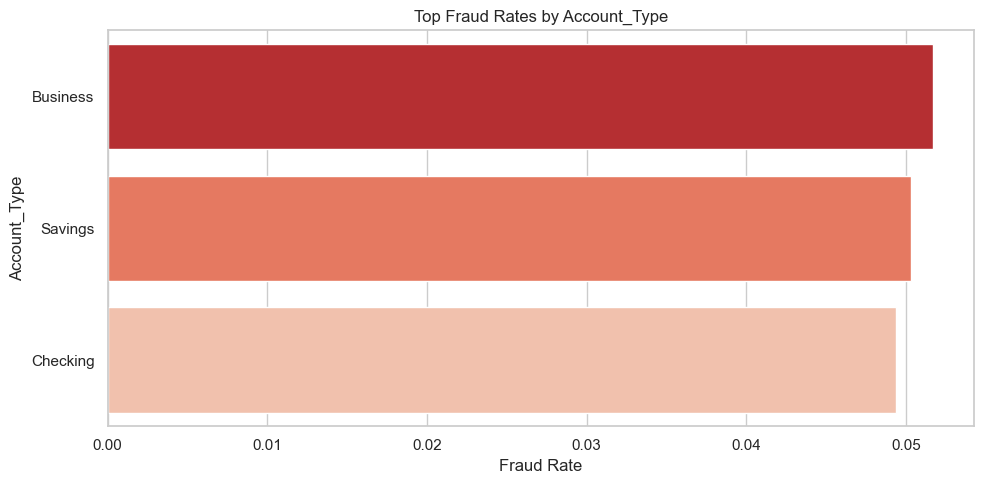

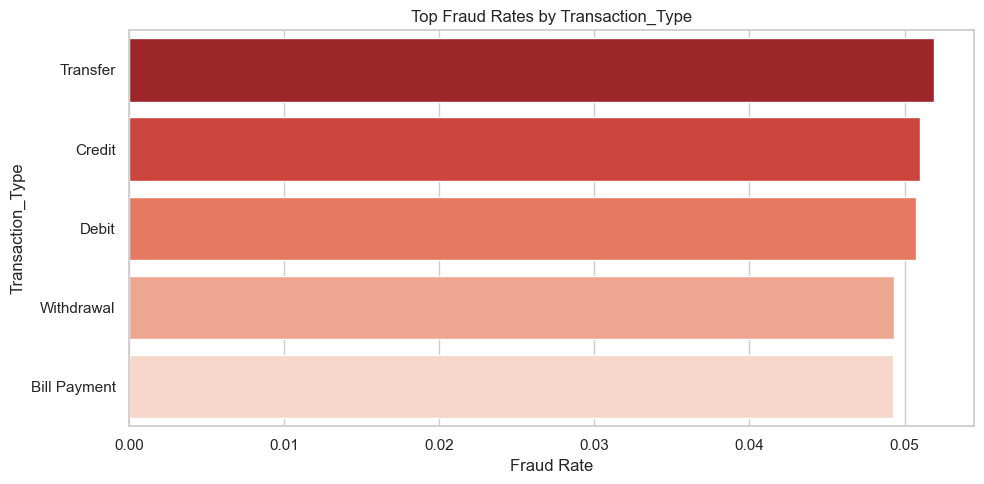

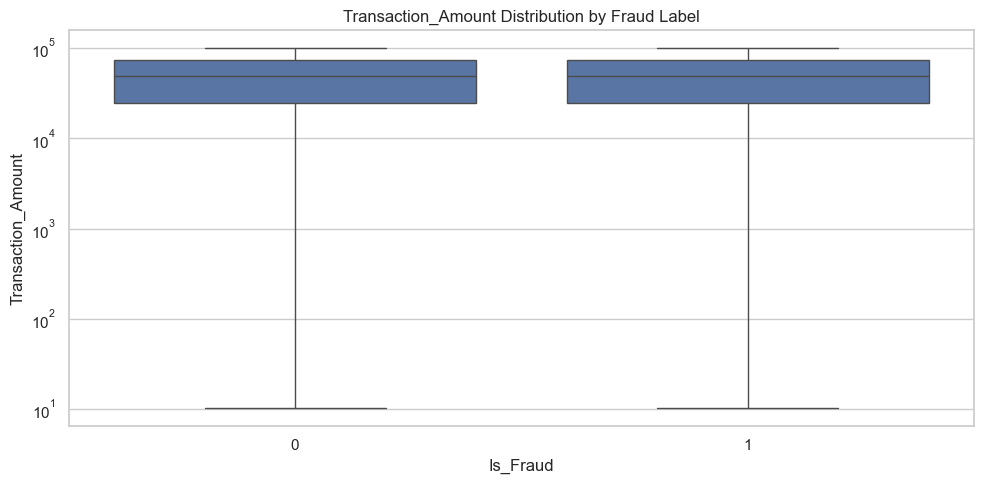

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, List, Tuple, Dict, Any

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Display Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 120
import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.append("../src/")

import pandas as pd
from eda_utils_prod import (
    overview,
    eda_descriptive,
    numeric_eda,
    categorical_summary,
    missing_heatmap,
    class_imbalance,
    fraud_rate_by_feature,
    fraud_by_time,
    amount_outlier_analysis,
    feature_cardinality
)
from preprocessing import (
    clean_missing,
    drop_irrelevant_columns,
    feature_engineering_advanced,
    encode_categorical
)

# =====================================================
# 1. Load RAW CSV
# =====================================================
df_raw = pd.read_csv("../data/raw/Bank_Transaction_Fraud_Detection.csv")
print("Loaded RAW:", df_raw.shape)

overview_stats = overview(df_raw)
print("Data Overview:", overview_stats)

# =====================================================
# 2. EDA (RAW DATA)
# =====================================================
eda_descriptive(df_raw)
numeric_eda(df_raw)
categorical_summary(df_raw)
missing_heatmap(df_raw)

# ---- Fraud-specific EDA ----
class_imbalance(df_raw)

fraud_rate_by_feature(df_raw, feature="Transaction_Device")
fraud_rate_by_feature(df_raw, feature="Account_Type")
fraud_rate_by_feature(df_raw, feature="Transaction_Type")

fraud_by_time(df_raw)
amount_outlier_analysis(df_raw)
feature_cardinality(df_raw)

# =====================================================
# 3. CLEANING & FEATURE ENGINEERING (NO ENCODING)
# =====================================================
df_clean = clean_missing(df_raw)

df_clean = drop_irrelevant_columns(df_clean, [
    "Customer_ID",
    "Customer_Name",
    "Merchant_ID",
    "Customer_Contact",
    "Customer_Email",
    "Transaction_ID",
    "Transaction_Description",
    "Transaction_Currency"
])

df_clean = feature_engineering_advanced(df_clean)

# =====================================================
# 4. SAVE CLEAN DATA (for Streamlit & rules)
# =====================================================
df_clean.to_csv(
    "../data/processed/bank_transactions_clean.csv",
    index=False
)
print("Saved CLEAN CSV:", df_clean.shape)

# =====================================================
# 5. ENCODE FOR ML ONLY
# =====================================================
df_features = encode_categorical(
    df_clean.copy(),
    drop_first=False,
    max_cardinality=50
)

df_features.to_csv(
    "../data/processed/bank_transactions_features.csv",
    index=False
)
print("Saved FEATURES CSV:", df_features.shape)


In [11]:
# # main.py
# import sys
# import os
# import logging
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# # Setup Logging
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
# logger = logging.getLogger(__name__)

# # Add src to path so we can import our modules
# sys.path.append("../src/")

# # Import custom modules
# # Note: Ensure your file is named eda_utils_prod.py or rename import below
# from eda_utils_prod import (
#     overview,
#     eda_descriptive,
#     missing_heatmap,
#     class_imbalance,
#     fraud_rate_by_feature,
#     fraud_by_time,
#     amount_outlier_analysis,
#     feature_cardinality
# )
# from preprocessing import (
#     clean_missing,
#     drop_irrelevant_columns,
#     feature_engineering_advanced,
#     encode_categorical
# )
# from modeling import (
#     split_X_y,
#     split_train_test,
#     scale_features,
#     train_simple_model,
#     evaluate_model
# )

# # Display Settings
# sns.set(style="whitegrid")
# plt.rcParams["figure.figsize"] = (10, 6)
# pd.options.display.max_columns = 120

# def ensure_directories():
#     """Ensure necessary directories exist."""
#     os.makedirs("../data/processed", exist_ok=True)
#     os.makedirs("../reports/figures", exist_ok=True)

# def main():
#     ensure_directories()
    
#     # =====================================================
#     # 1. Load RAW CSV
#     # =====================================================
#     input_path = "../data/raw/Bank_Transaction_Fraud_Detection.csv"
#     if not os.path.exists(input_path):
#         logger.error(f"File not found: {input_path}")
#         return

#     df_raw = pd.read_csv(input_path)
#     logger.info(f"Loaded RAW Data: {df_raw.shape}")

#     # =====================================================
#     # 2. EDA (RAW DATA)
#     # =====================================================
#     logger.info("--- Starting EDA ---")
    
#     # Overview
#     stats = overview(df_raw)
#     print("\nData Overview:", stats)

#     # Missing Values
#     fig_missing = missing_heatmap(df_raw)
#     if fig_missing:
#         fig_missing.savefig("../reports/figures/missing_heatmap.png")
#         plt.close()

#     # Class Imbalance
#     imbalance_stats = class_imbalance(df_raw, target="Is_Fraud")
#     print("\nClass Imbalance:", imbalance_stats)

#     # Fraud Rate by specific features (Plots saved to reports)
#     for feat in ["Transaction_Device", "Account_Type", "Transaction_Type"]:
#         stats, fig = fraud_rate_by_feature(df_raw, feature=feat)
#         if fig:
#             fig.savefig(f"../reports/figures/fraud_rate_{feat}.png")
#             plt.close()

#     # Time Analysis
#     time_figs = fraud_by_time(df_raw)
#     if time_figs.get("hour"):
#         time_figs["hour"].savefig("../reports/figures/fraud_by_hour.png")
#     if time_figs.get("weekday"):
#         time_figs["weekday"].savefig("../reports/figures/fraud_by_weekday.png")
#     plt.close('all')

#     # Outlier Analysis
#     outlier_stats = amount_outlier_analysis(df_raw)
#     print("\nOutlier Analysis (Amount):", outlier_stats['iqr_threshold'])
#     if outlier_stats['figure']:
#         outlier_stats['figure'].savefig("../reports/figures/amount_outliers.png")
#         plt.close()

#     # =====================================================
#     # 3. CLEANING & FEATURE ENGINEERING
#     # =====================================================
#     logger.info("--- Starting Preprocessing ---")
    
#     df_clean = clean_missing(df_raw)
    
#     # Drop IDs and PII
#     df_clean = drop_irrelevant_columns(df_clean, [
#         "Customer_ID", "Customer_Name", "Merchant_ID", 
#         "Customer_Contact", "Customer_Email", "Transaction_ID", 
#         "Transaction_Description", "Transaction_Currency"
#     ])
    
#     # Extract Dates and Freq Encode Cities
#     df_clean = feature_engineering_advanced(df_clean)

#     # =====================================================
#     # 4. SAVE CLEAN DATA (For Dashboards/Rules)
#     # =====================================================
#     clean_path = "../data/processed/bank_transactions_clean.csv"
#     df_clean.to_csv(clean_path, index=False)
#     logger.info(f"Saved Clean Data: {clean_path} {df_clean.shape}")

#     # =====================================================
#     # 5. ENCODE FOR ML
#     # =====================================================
#     # One-Hot Encoding for categorical variables
#     df_features = encode_categorical(
#         df_clean,
#         drop_first=True,  # Drop first to avoid dummy variable trap for Linear models
#         max_cardinality=50
#     )
    
#     features_path = "../data/processed/bank_transactions_features.csv"
#     df_features.to_csv(features_path, index=False)
#     logger.info(f"Saved Features for ML: {features_path} {df_features.shape}")

#     # =====================================================
#     # 6. MODELING PIPELINE
#     # =====================================================
#     logger.info("--- Starting Modeling ---")

#     # A. Split X and y
#     target_col = "Is_Fraud"
#     if target_col not in df_features.columns:
#         logger.error(f"Target {target_col} not found in features.")
#         return

#     X, y = split_X_y(df_features, target=target_col)

#     # B. Train/Test Split
#     X_train, X_test, y_train, y_test = split_train_test(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )

#     # C. Scaling (Fit on Train, Transform Test)
#     # Note: scale_features defaults to scaling only Float columns
#     X_train_sc, X_test_sc = scale_features(X_train, X_test, method="standard")

#     # D. Train Models
    
#     # 1. Logistic Regression
#     logger.info("Training Logistic Regression...")
#     lr_model = train_simple_model(
#         X_train_sc, y_train, 
#         problem="classification", 
#         model_name="logistic", 
#         resample=True # Uses SMOTE
#     )
#     lr_metrics = evaluate_model(lr_model, X_test_sc, y_test)
#     print("\nLogistic Regression Metrics:", lr_metrics)

#     # 2. Random Forest
#     logger.info("Training Random Forest...")
#     rf_model = train_simple_model(
#         X_train_sc, y_train, 
#         problem="classification", 
#         model_name="random_forest",
#         n_estimators=100,
#         max_depth=10,
#         resample=True
#     )
#     rf_metrics = evaluate_model(rf_model, X_test_sc, y_test)
#     print("\nRandom Forest Metrics:", rf_metrics)

#     logger.info("Pipeline Completed Successfully.")

# if __name__ == "__main__":
#     main()